In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
from statsmodels.stats.libqsturng import qsturng
import Orange
import itertools

In [3]:
name = '20160114-more-models'

Read cross-validation output for a given metric.

In [4]:
def read(how, date=name):
    return pd.read_csv('../output/{}/collection/results/crossvalidation_{}_raw_ie.csv'.format(date, how))

We'll use 7 different metrics for cross-validation.

In [5]:
#metrics = ['rmse', 'me', 'mae', 'xe', 'ef', 'ef1', 'd', 'd1', 'dr', 'm', 'r']
metrics = ['ef', 'ef1', 'd', 'd1', 'dr', 'm', 'r']

Create a dataframe from the output with given columns.

In [6]:
def load(columns, date=name):
    return pd.concat([read(m, date) for m in metrics]).set_index(['how', 'title', 'seq'])[columns]

In [7]:
def load2(columns, date=name):
    df = pd.concat([read(m, date) for m in metrics])
    df['group'] = (df.seq / 5).astype(int)
    return df.set_index(['how', 'title', 'group'])[columns]

Default functions (`load` and `rank`) treat cross-validation samples indepenently, whereas variant functions (`load2` and `rank2`) treat them as replicates.

We'll test 3 scenarios:
1. Between individual models
2. Individual models vs. an ensemble (EN)
3. Between ensemble models.

In [8]:
individuals = ['GD', 'CF', 'Beta', 'DTS', 'SF', 'TP', 'SM', 'PM', 'AM'] + ['M']
individuals_with_ensemble = individuals + ['EN']
ensembles = ['EN', 'EN.d', 'EN.d1', 'EN.dr', 'EN.ef', 'EN.ef1', 'EN.m', 'EN.r']
individuals_with_ensemble_all = individuals + ensembles

Here is a part of the dataframe for the second scenario.

In [9]:
load(individuals_with_ensemble).head()

GD         CF      Beta       DTS        SF  \
how title     seq                                                       
EF  cherry_dc 0     0.839466   0.669708  0.902769  0.939032  0.904015   
              1     0.501785   0.249883  0.709531  0.742803  0.711056   
              2     0.307813   0.034068  0.522499  0.756944  0.293122   
              3     0.403007  -0.212274 -0.086853 -2.660028 -2.108777   
              4   -17.483073 -10.821832 -9.009766 -9.584418 -4.274740   

                          TP         SM         PM         AM         M  \
how title     seq                                                         
EF  cherry_dc 0     0.704634   0.776311   0.836248   0.873599 -0.199922   
              1     0.750542  -0.010379  -0.025989   0.422338 -0.000608   
              2     0.296625   0.885657   0.882598 -18.049746 -0.009348   
              3     0.261708   0.395279   0.386689  -0.422731 -0.591007   
              4   -12.875000 -13.881510 -14.000217 -11.314236 -1.261254   

                         EN  
how title     seq            
EF  cherry_dc 0    0.911805  
              1    0.801077  
              2    0.293857  
              3    0.246444  
              4   -9.081433

In [10]:
load(ensembles).head()

EN       EN.d      EN.d1     EN.dr      EN.ef  \
how title     seq                                                        
EF  cherry_dc 0    0.911805   0.931783   0.931143  0.918715   0.931150   
              1    0.801077   0.811789   0.806852  0.782192   0.737905   
              2    0.293857   0.261279   0.272495  0.316760   0.323302   
              3    0.246444   0.172123   0.161593  0.214236   0.157971   
              4   -9.081433 -10.249963 -10.221621 -9.492868 -10.324453   

                      EN.ef1       EN.m       EN.r  
how title     seq                                   
EF  cherry_dc 0     0.929143   0.933413   0.933562  
              1     0.719487   0.797068   0.796431  
              2     0.353803   0.293035   0.285389  
              3     0.135690   0.155488   0.148831  
              4   -10.257690 -10.324146 -10.307828

In [11]:
load2(ensembles).head()

EN       EN.d      EN.d1     EN.dr      EN.ef  \
how title     group                                                        
EF  cherry_dc 0      0.911805   0.931783   0.931143  0.918715   0.931150   
              0      0.801077   0.811789   0.806852  0.782192   0.737905   
              0      0.293857   0.261279   0.272495  0.316760   0.323302   
              0      0.246444   0.172123   0.161593  0.214236   0.157971   
              0     -9.081433 -10.249963 -10.221621 -9.492868 -10.324453   

                        EN.ef1       EN.m       EN.r  
how title     group                                   
EF  cherry_dc 0       0.929143   0.933413   0.933562  
              0       0.719487   0.797068   0.796431  
              0       0.353803   0.293035   0.285389  
              0       0.135690   0.155488   0.148831  
              0     -10.257690 -10.324146 -10.307828

Generate a rank out of the dataframe.

In [12]:
def rank(df):
    return df.rank(axis=1, ascending=False).groupby(level=[0,1]).mean()

In [13]:
def rank2(df):
    return df.rank(axis=1, ascending=False).groupby(level=[0,1,2]).mean()

Here is a part of the generated ranks for the second scenario.

In [14]:
rank(load(individuals_with_ensemble)).head()

GD        CF      Beta       DTS        SF  \
how title                                                                   
D   apple_kearneysville  5.504545  5.072727  5.481818  5.713636  5.468182   
    cherry_dc            6.100000  5.700000  5.300000  4.600000  5.500000   
    cherry_korea         5.569231  5.076923  5.553846  5.292308  5.969231   
    peach_korea          6.004000  4.934000  6.220000  5.306000  5.942000   
    pear_korea           5.734000  4.690000  5.804000  5.718000  6.166000   

                               TP        SM        PM        AM          M  \
how title                                                                    
D   apple_kearneysville  5.677273  6.636364  6.890909  7.145455   8.254545   
    cherry_dc            6.700000  5.100000  4.700000  8.000000   9.300000   
    cherry_korea         6.123077  5.692308  5.584615  6.369231  10.538462   
    peach_korea          6.498000  5.420000  5.692000  5.710000   9.596000   
    pear_korea           6.442000  6.004000  5.904000  5.342000   9.190000   

                               EN  
how title                          
D   apple_kearneysville  4.154545  
    cherry_dc            5.000000  
    cherry_korea         4.230769  
    peach_korea          4.678000  
    pear_korea           5.006000

In [15]:
rank(load(ensembles)).head()

EN      EN.d     EN.d1     EN.dr     EN.ef  \
how title                                                                   
D   apple_kearneysville  4.654545  4.204545  4.159091  4.486364  4.645455   
    cherry_dc            5.350000  4.850000  4.750000  4.450000  4.150000   
    cherry_korea         5.338462  4.692308  4.630769  4.723077  4.200000   
    peach_korea          5.486000  4.562000  4.302000  5.078000  4.414000   
    pear_korea           5.236000  4.276000  4.208000  4.928000  4.732000   

                           EN.ef1      EN.m      EN.r  
how title                                              
D   apple_kearneysville  4.436364  4.922727  4.490909  
    cherry_dc            4.250000  4.050000  4.150000  
    cherry_korea         3.953846  4.261538  4.200000  
    peach_korea          4.266000  4.032000  3.860000  
    pear_korea           4.636000  4.040000  3.944000

In [16]:
rank2(load2(individuals_with_ensemble)).head()

GD   CF  Beta  DTS   SF   TP   SM   PM   AM  \
how title               group                                                 
D   apple_kearneysville 0      6.2  4.8   6.2  5.6  3.2  5.8  7.0  6.2  6.8   
                        1      8.2  2.6   6.6  7.2  5.2  4.2  5.8  6.0  8.8   
                        2      5.0  4.2   5.6  5.4  5.2  4.8  7.9  8.3  7.8   
                        3      5.2  6.4   5.4  5.6  5.6  4.0  7.3  7.3  6.0   
                        4      6.4  4.6   6.4  7.0  6.6  3.8  6.2  6.0  6.4   

                                  M   EN  
how title               group             
D   apple_kearneysville 0      10.2  4.0  
                        1       9.0  2.4  
                        2       8.6  3.2  
                        3       8.4  4.8  
                        4       9.4  3.2

Now we have 3 rank dataframes for each scenario.

Average across all datasets, giving one sample per model.

In [17]:
rii = rank(load(individuals))
rie = rank(load(individuals_with_ensemble))
ree = rank(load(ensembles))
rall = rank(load(individuals_with_ensemble_all))

In [18]:
#rii.to_csv('rii.csv')
#rie.to_csv('rie.csv')
#ree.to_csv('ree.csv')
#rall.to_csv('rall.csv)

Make an individual sample by different species, but merge replicates from crossvalidation.

In [19]:
rii2 = rank2(load2(individuals))
rie2 = rank2(load2(individuals_with_ensemble))
ree2 = rank2(load2(ensembles))
rall2 = rank2(load2(individuals_with_ensemble_all))

Count crossvalidation as an individual sample.

In [20]:
rii3 = rank2(load(individuals))
rie3 = rank2(load(individuals_with_ensemble))
ree3 = rank2(load(ensembles))
rall3 = rank2(load(individuals_with_ensemble_all))

Conduct Friedman test on the rank dataframe.

In [21]:
def friedman(rdf, how):
    return st.friedmanchisquare(*rdf.loc[how].as_matrix().T)

In [22]:
def friedmans(rdf):
    return pd.DataFrame({h: friedman(rdf, h) for h in hows}, index=['statistic', 'pvalue'])

Friedman test over individual models for Willmot's refined index of agreement (Dr) turns out to be non-significant (p=0.08).

In [23]:
friedman(rii, 'DR')

FriedmanchisquareResult(statistic=31.560000000000002, pvalue=0.0002371731686279505)

In [24]:
friedman(rii2, 'DR')

FriedmanchisquareResult(statistic=228.3453352964797, pvalue=3.6699796865340437e-44)

On the other hand, Friedman test over individuals with an ensemble model turns out to be significant (p=0.01) that there is a difference between models, in this case, due to the just added ensemble model.

In [25]:
friedman(rie, 'DR')

FriedmanchisquareResult(statistic=37.890909090909076, pvalue=3.9647407079393145e-05)

In [26]:
friedman(rie2, 'DR')

FriedmanchisquareResult(statistic=382.64980960652019, pvalue=4.6201001399264067e-76)

Meanwhile, Friedman test over different ensemble models turns out to be highly non-significant (p=0.65), so we can't tell there is a difference in performance between them.

In [27]:
friedman(ree, 'DR')

FriedmanchisquareResult(statistic=25.052631578947373, pvalue=0.00074266893567329865)

In [28]:
friedman(ree2, 'DR')

FriedmanchisquareResult(statistic=164.39446612273869, pvalue=3.8107402603090474e-32)

Here is a summary over all metrics.

Friedman tests over individual models. They are all non-significant at p=0.05.

In [29]:
hows = rii.index.levels[0]
hows

Index(['D', 'D1', 'DR', 'EF', 'EF1', 'M', 'R'], dtype='object', name='how')

In [30]:
friedmans(rii)

,D,D1,DR,EF,EF1,M,R
statistic,25.669091,29.599515,31.560000,32.408759,31.560000,23.879562,25.184690
pvalue,0.002314,0.000513,0.000237,0.000169,0.000237,0.004496,0.002774


In [31]:
friedmans(rii2)

,D,D1,DR,EF,EF1,M,R
statistic,3.171514e+02,3.104115e+02,2.283453e+02,2.115764e+02,2.283453e+02,3.275510e+02,3.158537e+02
pvalue,5.974005e-63,1.612001e-61,3.669980e-44,1.233460e-40,3.669980e-44,3.687668e-65,1.126863e-62


In [32]:
friedmans(rank2(load2(['GD', 'CF', 'Beta'])))

,D,D1,DR,EF,EF1,M,R
statistic,3.114919e+01,11.143418,2.521569,1.821359,2.521569,3.102924e+01,18.003945
pvalue,1.722021e-07,0.003804,0.283432,0.402251,0.283432,1.828463e-07,0.000123


Friedman tests over individual models with an ensemble model. They are all significant at p=0.01.

In [33]:
friedmans(rie)

,D,D1,DR,EF,EF1,M,R
statistic,32.763636,34.294813,37.890909,38.098271,37.890909,30.236579,31.292084
pvalue,0.000298,0.000165,0.000040,0.000036,0.000040,0.000784,0.000525


In [34]:
friedmans(rie2)

,D,D1,DR,EF,EF1,M,R
statistic,3.833563e+02,3.803000e+02,3.826498e+02,3.791747e+02,3.826498e+02,3.860941e+02,3.714131e+02
pvalue,3.269102e-76,1.459697e-75,4.620100e-76,2.532248e-75,4.620100e-76,8.554808e-77,1.130219e-73


Friedman test over ensemble models. Most of them are highly non-significant, but there are a couple that indicates significance.

In [35]:
friedmans(ree)

,D,D1,DR,EF,EF1,M,R
statistic,17.751196,15.205742,25.052632,28.185542,25.052632,21.801909,9.887290
pvalue,0.013144,0.033451,0.000743,0.000204,0.000743,0.002748,0.195051


In [36]:
friedmans(ree2)

,D,D1,DR,EF,EF1,M,R
statistic,7.881792e+01,5.510632e+01,1.643945e+02,2.014571e+02,1.643945e+02,1.438313e+02,37.157346
pvalue,2.398976e-14,1.420311e-09,3.810740e-32,5.639762e-40,3.810740e-32,7.999267e-28,0.000004


Look at the difference between averaged ranks.

In [37]:
rii2.groupby(level='how').mean()

,GD,CF,Beta,DTS,SF,TP,SM,PM,AM,M
how,,,,,,,,,,
D,5.165693,4.399270,5.248905,4.922628,5.287591,5.651825,5.241606,5.315328,5.305839,8.461314
D1,5.035036,4.537956,5.221898,4.919708,5.284672,5.702190,5.207299,5.371533,5.435766,8.283942
DR,4.956934,5.081022,5.156204,4.326277,5.017518,5.698540,5.775912,5.912409,6.162044,6.913139
EF,4.978467,5.116788,5.144526,4.280292,5.001460,5.710219,5.798175,5.943066,6.195620,6.831387
EF1,4.928467,5.083212,5.147993,4.300912,5.006204,5.692336,5.782482,5.930657,6.188504,6.939234
M,5.262774,4.358394,5.228467,4.983942,5.332117,5.695620,5.135036,5.207299,5.251095,8.545255
R,5.140876,4.489051,5.171533,4.981022,5.327007,5.605109,5.243796,5.293431,5.346715,8.401460


In [38]:
rii2.mean(axis=0).sort_values()

DTS     4.673540
CF      4.723670
GD      5.066893
SF      5.179510
Beta    5.188504
SM      5.454901
PM      5.567675
TP      5.679406
AM      5.697941
M       7.767961
dtype: float64

Calculate critial difference for Nemenyi test.

In [39]:
def critical_value(p, k):
    return qsturng(1-p, k, np.inf) / np.sqrt(2)

def critical_difference(p, k, n):
    return critical_value(p, k) * np.sqrt((k*(k+1)) / (6*n))

In [40]:
critical_difference(0.05, 4, 5)

2.0975924614902377

In [41]:
critical_difference(0.05, 5, 5)

2.7277508838690383

In [42]:
critical_difference(0.05, 8, 5)

4.6953889282071719

In [43]:
critical_difference(0.05, 4, 137)

0.40072444135775453

In [44]:
critical_difference(0.10, 4, 137)

0.35739849198748025

In [45]:
critical_difference(0.05, 5, 137)

0.52111001978189975

In [46]:
critical_difference(0.05, 8, 137)

0.89700794589834176

In [47]:
def plot_ranks(rdf, how, p=0.05, mark=None, lowv=None, highv=None, **kwargs):
    df = rdf.loc[how]
    s = df.mean(axis=0)
    cd = critical_difference(p, len(s), len(df))
    Orange.evaluation.graph_ranks(s, s.index, cd, mark, lowv=lowv, highv=highv, **kwargs)

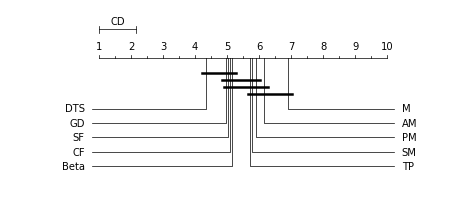

In [117]:
plot_ranks(rii2, 'DR')

In [118]:
def plot_ranks_all(rdf, p=0.05, mark=None, lowv=None, highv=None, filename=None, **kwargs):
    hows = rdf.index.levels[0]
    print(hows)
    for how in hows:
        plot_ranks(rdf, how, p, mark, lowv, highv, filename=filename.format(how), **kwargs)

Index(['D', 'D1', 'DR', 'EF', 'EF1', 'M', 'R'], dtype='object', name='how')


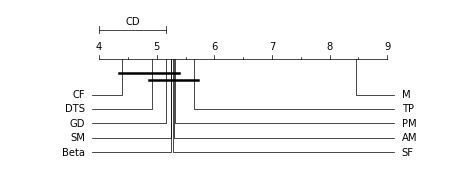

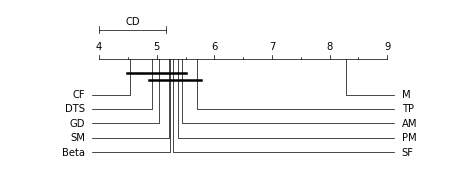

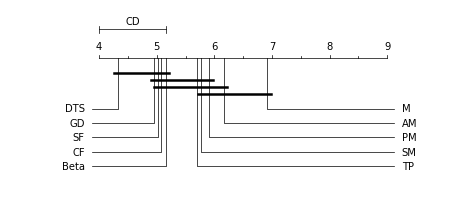

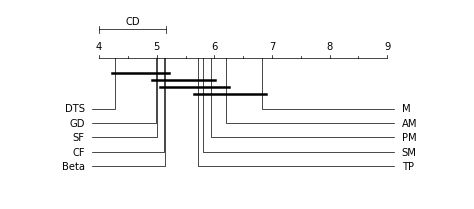

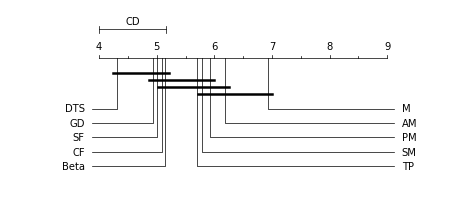

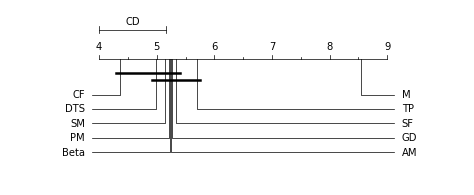

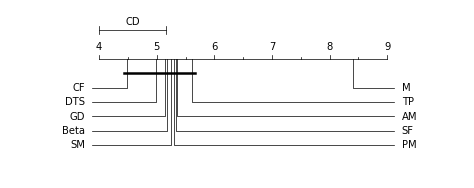

In [119]:
plot_ranks_all(rii2, lowv=4, highv=9, filename='rii2_{}.png', dpi=300)

Index(['D', 'D1', 'DR', 'EF', 'EF1', 'M', 'R'], dtype='object', name='how')


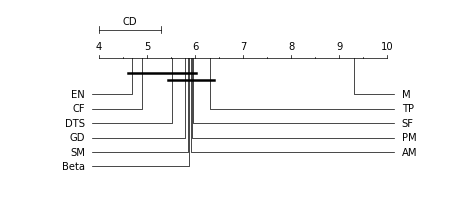

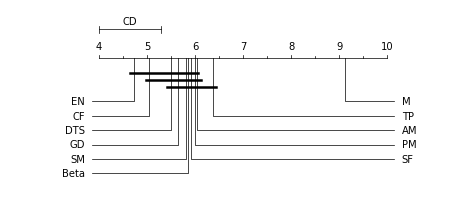

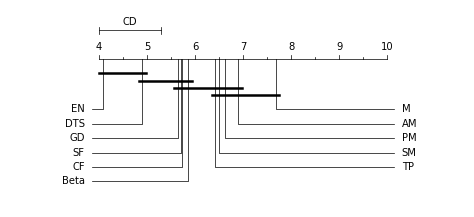

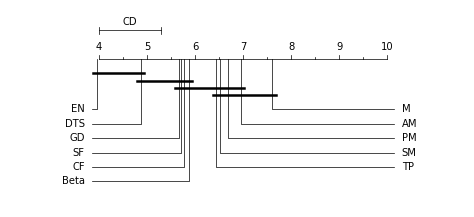

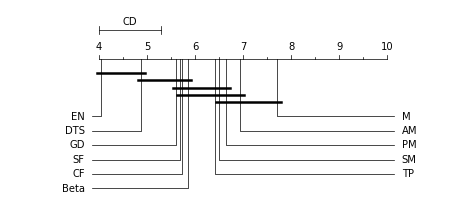

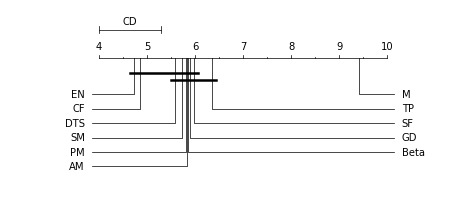

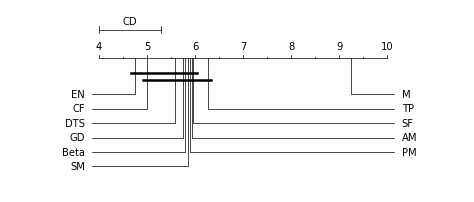

In [120]:
plot_ranks_all(rie2, lowv=4, highv=10, filename='rie2_{}.png', dpi=300)

Index(['D', 'D1', 'DR', 'EF', 'EF1', 'M', 'R'], dtype='object', name='how')


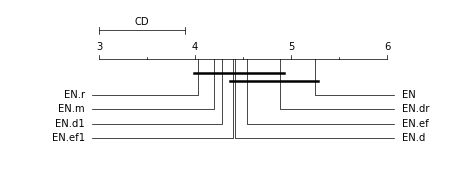

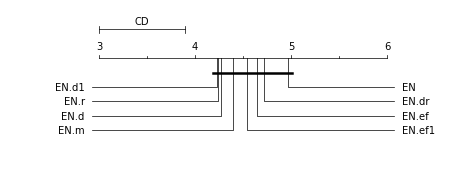

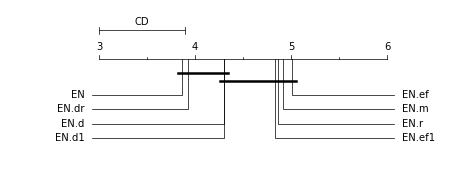

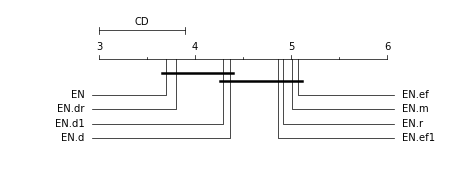

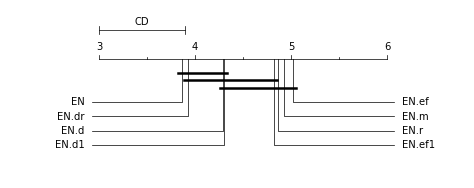

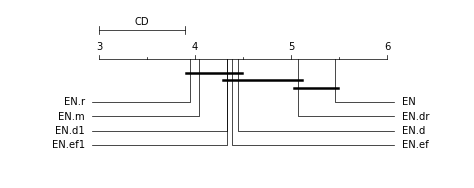

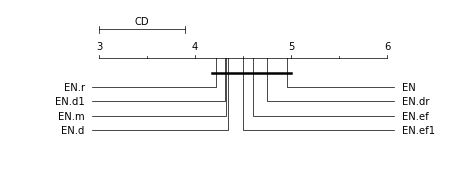

In [121]:
plot_ranks_all(ree2, lowv=3, highv=6, filename='ree2_{}.png', dpi=300)

Index(['D', 'D1', 'DR', 'EF', 'EF1', 'M', 'R'], dtype='object', name='how')


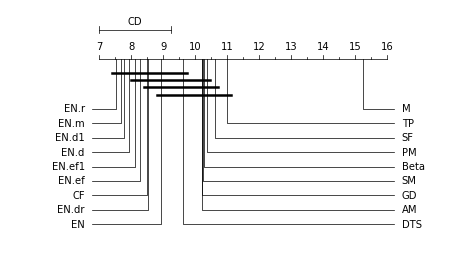

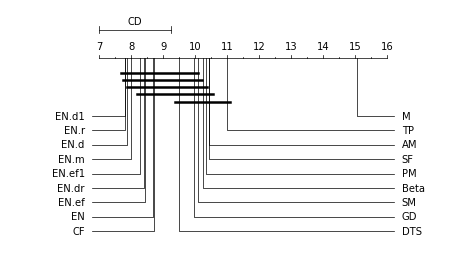

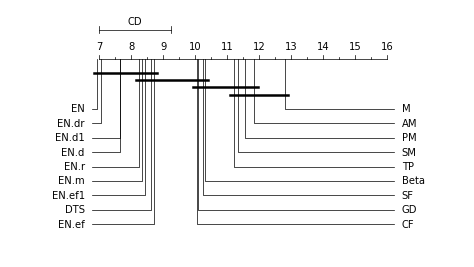

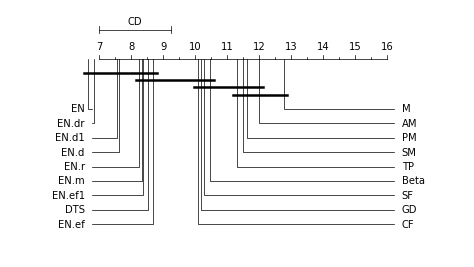

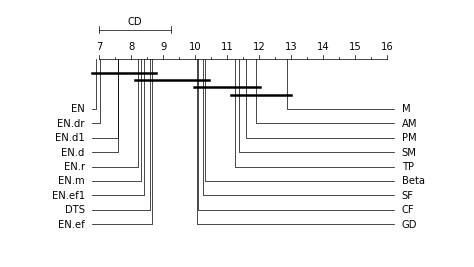

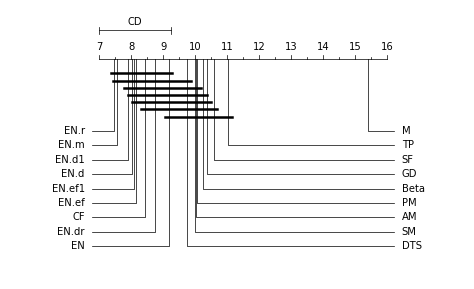

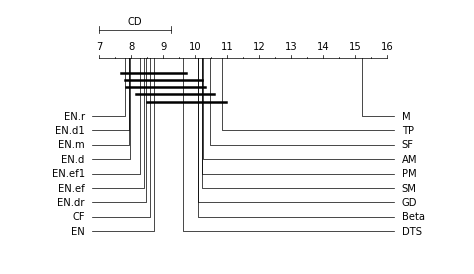

In [122]:
plot_ranks_all(rall2, lowv=7, highv=16, filename='rall2_{}.png', dpi=300)

Index(['D', 'D1', 'DR', 'EF', 'EF1', 'M', 'R'], dtype='object', name='how')


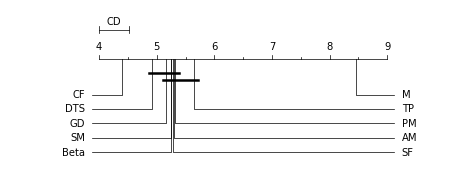

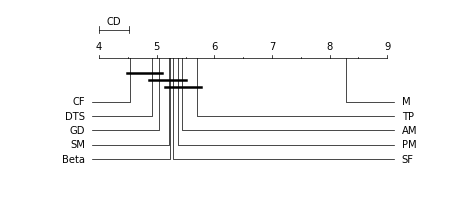

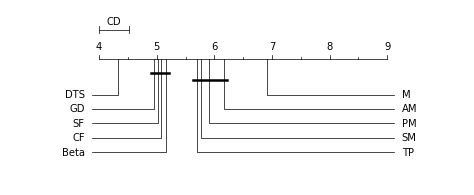

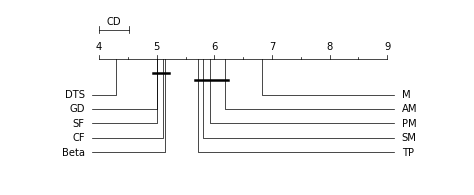

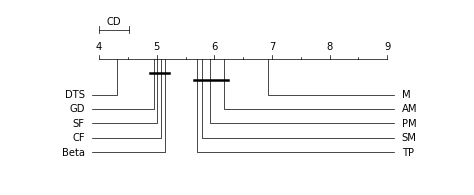

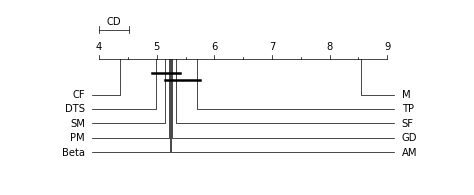

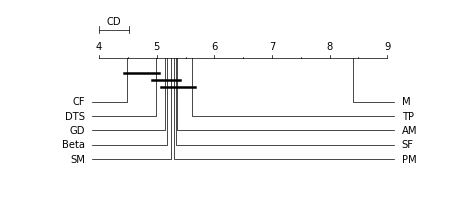

In [123]:
plot_ranks_all(rii3, lowv=4, highv=9, filename='rii3_{}.png', dpi=300)

Index(['D', 'D1', 'DR', 'EF', 'EF1', 'M', 'R'], dtype='object', name='how')


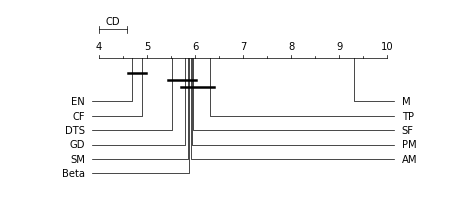

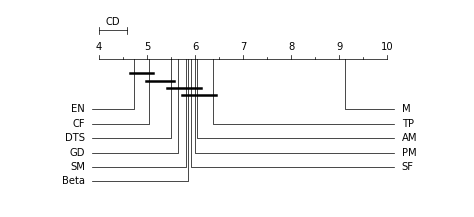

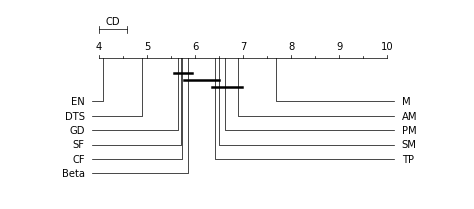

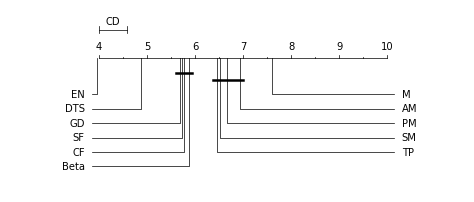

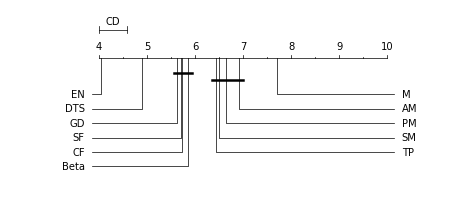

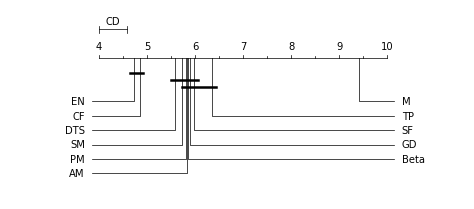

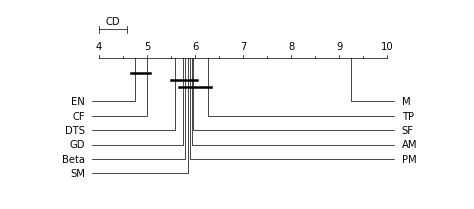

In [124]:
plot_ranks_all(rie3, lowv=4, highv=10, filename='rie3_{}.png', dpi=300)

Index(['D', 'D1', 'DR', 'EF', 'EF1', 'M', 'R'], dtype='object', name='how')


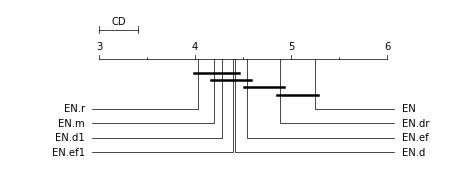

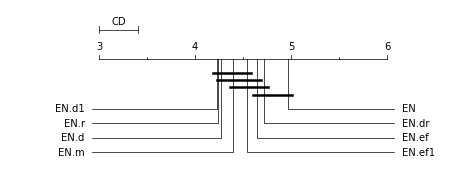

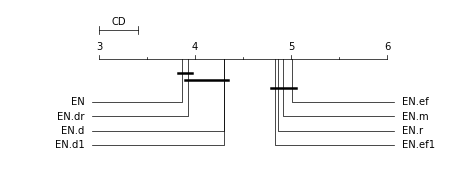

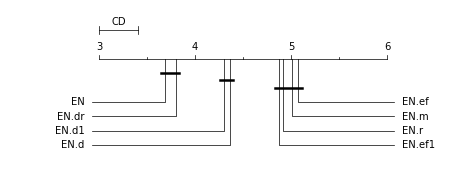

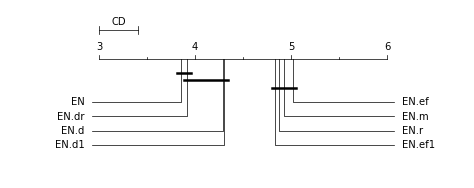

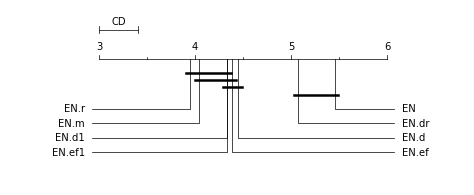

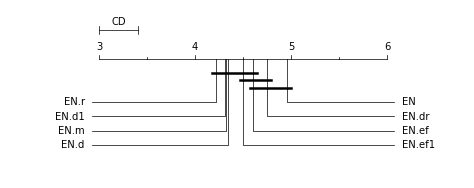

In [125]:
plot_ranks_all(ree3, lowv=3, highv=6, filename='ree3_{}.png', dpi=300)

Index(['D', 'D1', 'DR', 'EF', 'EF1', 'M', 'R'], dtype='object', name='how')


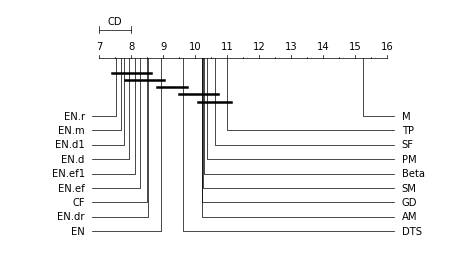

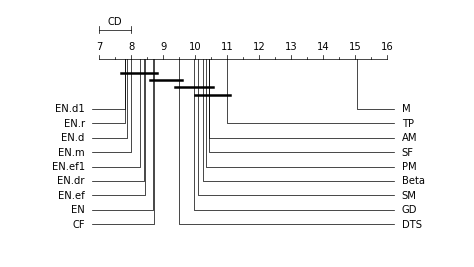

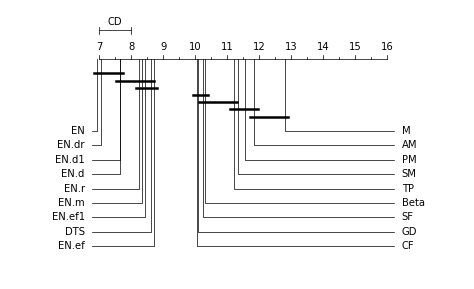

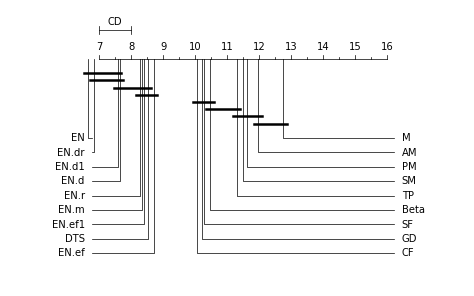

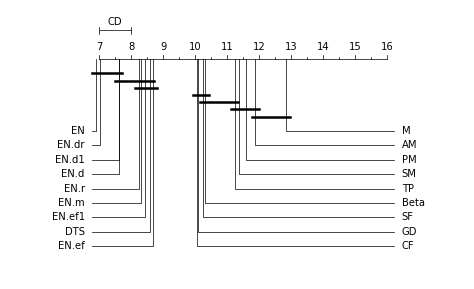

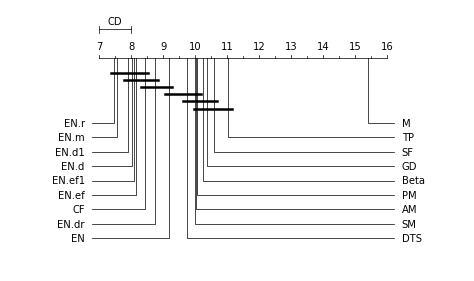

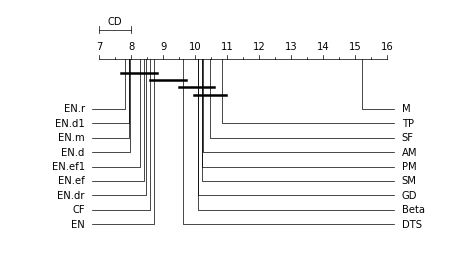

In [126]:
plot_ranks_all(rall3, lowv=7, highv=16, filename='rall3_{}.png', dpi=300)

Implement Nemenyi test.

In [58]:
def nemenyi(rdf, how, p=0.05, boolean=True):
    df = rdf.loc[how]
    s = df.mean(axis=0)
    C = list(itertools.combinations(s.index, 2))
    cd = critical_difference(p, len(s), len(df))
    if boolean:
        return pd.Series({"{}-{}".format(b, a): abs(s[b] - s[a]) > cd for (a, b) in C})
    else:
        r = pd.Series({"{}-{}".format(b, a): s[b] - s[a] for (a, b) in C})
        r['critical difference'] = cd
        return r

In [59]:
def nemenyis(rdf, p=0.05, boolean=True):
    return pd.DataFrame({h: nemenyi(rdf, h, p, boolean) for h in hows})

In [60]:
nemenyi(rii2, 'DR')

AM-Beta     False
AM-CF       False
AM-DTS       True
AM-GD        True
AM-PM       False
AM-SF       False
AM-SM       False
AM-TP       False
Beta-CF     False
Beta-GD     False
CF-GD       False
DTS-Beta    False
DTS-CF      False
DTS-GD      False
M-AM        False
M-Beta       True
M-CF         True
M-DTS        True
M-GD         True
M-PM        False
M-SF         True
M-SM        False
M-TP         True
PM-Beta     False
PM-CF       False
PM-DTS       True
PM-GD       False
PM-SF       False
PM-SM       False
PM-TP       False
SF-Beta     False
SF-CF       False
SF-DTS      False
SF-GD       False
SM-Beta     False
SM-CF       False
SM-DTS       True
SM-GD       False
SM-SF       False
SM-TP       False
TP-Beta     False
TP-CF       False
TP-DTS       True
TP-GD       False
TP-SF       False
dtype: bool

In [61]:
nemenyi(rii2, 'DR', boolean=False)

AM-Beta                1.005839
AM-CF                  1.081022
AM-DTS                 1.835766
AM-GD                  1.205109
AM-PM                  0.249635
AM-SF                  1.144526
AM-SM                  0.386131
AM-TP                  0.463504
Beta-CF                0.075182
Beta-GD                0.199270
CF-GD                  0.124088
DTS-Beta              -0.829927
DTS-CF                -0.754745
DTS-GD                -0.630657
M-AM                   0.751095
M-Beta                 1.756934
M-CF                   1.832117
M-DTS                  2.586861
M-GD                   1.956204
M-PM                   1.000730
M-SF                   1.895620
M-SM                   1.137226
M-TP                   1.214599
PM-Beta                0.756204
PM-CF                  0.831387
PM-DTS                 1.586131
PM-GD                  0.955474
PM-SF                  0.894891
PM-SM                  0.136496
PM-TP                  0.213869
SF-Beta               -0.138686
SF-CF   

In [62]:
nemenyis(rii2, p=0.05)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,True,True,True,False,False
AM-GD,False,False,True,True,True,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,True,True,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [63]:
nemenyis(rii2, p=0.05, boolean=False)

,D,D1,DR,EF,EF1,M,R
AM-Beta,0.056934,0.213869,1.005839,1.051095,1.040511,0.022628,0.175182
AM-CF,0.906569,0.897810,1.081022,1.078832,1.105292,0.892701,0.857664
AM-DTS,0.383212,0.516058,1.835766,1.915328,1.887591,0.267153,0.365693
AM-GD,0.140146,0.400730,1.205109,1.217153,1.260036,-0.011679,0.205839
AM-PM,-0.009489,0.064234,0.249635,0.252555,0.257847,0.043796,0.053285
AM-SF,0.018248,0.151095,1.144526,1.194161,1.182299,-0.081022,0.019708
AM-SM,0.064234,0.228467,0.386131,0.397445,0.406022,0.116058,0.102920
AM-TP,-0.345985,-0.266423,0.463504,0.485401,0.496168,-0.444526,-0.258394
Beta-CF,0.849635,0.683942,0.075182,0.027737,0.064781,0.870073,0.682482
Beta-GD,0.083212,0.186861,0.199270,0.166058,0.219526,-0.034307,0.030657


DR metric indicated that DTS was significantly better than Beta. EF metric indicated that DTS was significantly better than CF and Beta. But, no metric could show significant difference between DTS and GD. Also, there was no significance reported by other five metrics at all. All tests were conducted at p=0.05 level.

In [64]:
rii2

GD   CF  Beta  DTS   SF   TP   SM   PM   AM  \
how title               group                                                 
D   apple_kearneysville 0      5.6  4.0   5.4  5.0  2.8  5.4  6.0  5.4  6.2   
                        1      7.2  2.0   5.6  6.2  4.2  3.6  5.2  5.2  7.8   
                        2      4.2  3.6   4.8  4.8  4.4  4.2  6.9  7.5  6.8   
                        3      4.7  5.7   4.9  5.1  5.1  3.5  6.6  6.4  5.3   
                        4      5.5  3.9   5.7  6.1  5.7  3.3  5.5  5.3  5.5   
                        5      4.8  3.2   5.6  5.6  4.6  4.2  6.4  7.8  6.8   
                        6      5.1  5.7   6.1  4.1  4.7  5.3  4.8  5.8  6.3   
                        7      4.1  3.5   4.7  4.9  5.9  6.5  6.7  5.7  6.1   
                        8      5.4  4.4   3.9  5.4  4.8  6.2  7.0  5.9  5.1   
                        9      4.5  5.5   6.1  4.7  4.1  5.9  6.1  4.1  6.5   
                        10     4.5  5.3   6.1  5.3  5.1  5.9  6.1  4.1  5.3   
                        11     3.4  6.0   4.0  2.0  4.2  8.0  6.7  7.5  5.8   
                        12     5.1  4.7   5.1  4.9  4.3  4.5  5.7  6.3  6.1   
                        13     6.0  4.1   3.6  5.4  5.0  6.0  5.9  6.5  6.3   
                        14     2.6  5.6   3.4  5.4  4.6  5.4  5.0  5.8  9.0   
                        15     5.1  2.7   6.1  4.9  5.7  3.9  4.5  7.3  6.1   
                        16     6.0  2.6   3.0  5.4  5.4  5.0  6.0  6.4  7.0   
                        17     5.2  5.0   5.6  4.6  5.0  4.6  5.9  5.7  6.2   
                        18     3.9  7.1   3.7  5.9  5.7  4.5  4.6  5.0  7.3   
                        19     6.0  3.4   3.8  4.6  6.4  5.8  5.2  5.8  6.4   
                        20     5.5  3.5   4.4  6.6  3.8  4.7  5.2  7.7  5.6   
                        21     3.5  5.3   6.0  4.1  4.9  4.5  7.3  8.0  6.7   
    cherry_dc           0      5.9  6.5   4.0  4.7  5.0  4.4  5.1  5.3  6.1   
                        1      5.2  3.8   5.6  3.6  4.8  8.0  4.0  3.2  8.0   
    cherry_korea        0      6.4  5.0   5.2  5.6  5.6  7.2  5.2  2.4  2.6   
                        1      6.8  3.8   3.6  6.6  3.4  5.0  5.6  6.0  4.2   
                        2      4.8  3.2   4.6  4.4  6.0  4.0  6.2  8.0  3.8   
                        3      4.2  4.8   4.0  3.6  3.4  7.8  4.6  6.2  6.4   
                        4      5.8  4.0   7.2  4.8  6.0  3.4  3.8  4.2  6.4   
                        5      4.6  3.8   3.4  4.6  6.0  4.6  6.4  6.8  5.4   
...                            ...  ...   ...  ...  ...  ...  ...  ...  ...   
R   pear_korea          20     6.8  2.4   6.2  3.8  5.6  6.2  4.2  4.0  7.0   
                        21     4.2  4.4   4.8  5.2  4.0  5.6  7.0  5.8  5.8   
                        22     5.6  4.6   6.1  5.1  4.7  4.5  7.0  6.7  3.5   
                        23     6.2  5.8   5.2  5.2  5.4  4.6  5.8  4.8  5.4   
                        24     5.2  4.8   4.3  5.4  6.2  5.4  5.6  6.6  3.6   
                        25     6.2  3.6   4.4  4.8  6.0  6.4  4.6  5.8  5.0   
                        26     6.6  4.6   5.0  4.0  5.2  4.5  6.0  6.8  6.8   
                        27     5.0  2.2   4.6  6.6  7.4  1.6  5.8  6.6  5.6   
                        28     3.8  5.4   4.6  5.0  4.2  5.5  5.4  6.6  4.8   
                        29     5.4  4.2   6.2  7.0  6.2  6.4  4.6  4.8  3.4   
                        30     5.9  5.5   5.3  5.9  4.7  5.2  4.3  5.1  6.1   
                        31     3.9  3.4   5.1  4.6  5.3  7.9  5.9  5.7  5.3   
                        32     5.8  3.6   6.4  3.0  8.0  5.6  5.2  6.8  3.2   
                        33     5.0  2.8   5.8  5.6  7.2  5.2  5.6  4.4  3.6   
                        34     4.6  5.0   6.0  4.4  6.4  5.6  5.0  5.0  4.2   
                        35     6.8  2.8   3.8  5.8  5.2  7.1  4.0  7.4  5.4   
                        36     6.6  5.2   5.2  4.8  4.4  7.6  3.0  2.8  5.4   
                        37     5.2  5.6   5.2  4.8  4.6  6.3  4.4  3.6  6.0   
   

In [65]:
nemenyis(rii2, p=0.10)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,True,True,True,False,False
AM-DTS,False,False,True,True,True,False,False
AM-GD,False,False,True,True,True,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,True,True,True,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [66]:
nemenyis(rii2, p=0.10, boolean=False)

,D,D1,DR,EF,EF1,M,R
AM-Beta,0.056934,0.213869,1.005839,1.051095,1.040511,0.022628,0.175182
AM-CF,0.906569,0.897810,1.081022,1.078832,1.105292,0.892701,0.857664
AM-DTS,0.383212,0.516058,1.835766,1.915328,1.887591,0.267153,0.365693
AM-GD,0.140146,0.400730,1.205109,1.217153,1.260036,-0.011679,0.205839
AM-PM,-0.009489,0.064234,0.249635,0.252555,0.257847,0.043796,0.053285
AM-SF,0.018248,0.151095,1.144526,1.194161,1.182299,-0.081022,0.019708
AM-SM,0.064234,0.228467,0.386131,0.397445,0.406022,0.116058,0.102920
AM-TP,-0.345985,-0.266423,0.463504,0.485401,0.496168,-0.444526,-0.258394
Beta-CF,0.849635,0.683942,0.075182,0.027737,0.064781,0.870073,0.682482
Beta-GD,0.083212,0.186861,0.199270,0.166058,0.219526,-0.034307,0.030657


The ensemble model (EN) was significantly better than Beta and GD in all metrics. Three metrics, DR, EF, and EF1, reported significant difference against CF. Two metrics, D and M, reported significant difference against DTS. (p=0.05).

In [67]:
nemenyis(rie2, p=0.05)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,True,True,True,False,False
AM-GD,False,False,False,False,True,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [68]:
nemenyis(rie2, p=0.05, boolean=False)

,D,D1,DR,EF,EF1,M,R
AM-Beta,0.029197,0.189051,1.048175,1.081022,1.086496,-0.028467,0.154745
AM-CF,1.010219,0.995620,1.178102,1.181752,1.203832,0.981022,0.952555
AM-DTS,0.391971,0.549635,2.000730,2.082482,2.058394,0.250365,0.364964
AM-GD,0.116788,0.402190,1.263504,1.283942,1.324270,-0.059854,0.197810
AM-PM,-0.035036,0.048905,0.271533,0.268613,0.281569,0.024818,0.052555
AM-SF,-0.041606,0.123358,1.198540,1.230657,1.240328,-0.151095,-0.015328
AM-SM,0.052555,0.235766,0.410949,0.417518,0.432664,0.094891,0.093431
AM-TP,-0.410949,-0.324088,0.479562,0.502555,0.514781,-0.525547,-0.315328
Beta-CF,0.981022,0.806569,0.129927,0.100730,0.117336,1.009489,0.797810
Beta-GD,0.087591,0.213139,0.215328,0.202920,0.237774,-0.031387,0.043066


In [69]:
nemenyis(rie2, p=0.10)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,True,False,False
AM-DTS,False,False,True,True,True,False,False
AM-GD,False,False,True,True,True,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,True,True,True,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [70]:
nemenyis(rie2, p=0.10, boolean=False)

,D,D1,DR,EF,EF1,M,R
AM-Beta,0.029197,0.189051,1.048175,1.081022,1.086496,-0.028467,0.154745
AM-CF,1.010219,0.995620,1.178102,1.181752,1.203832,0.981022,0.952555
AM-DTS,0.391971,0.549635,2.000730,2.082482,2.058394,0.250365,0.364964
AM-GD,0.116788,0.402190,1.263504,1.283942,1.324270,-0.059854,0.197810
AM-PM,-0.035036,0.048905,0.271533,0.268613,0.281569,0.024818,0.052555
AM-SF,-0.041606,0.123358,1.198540,1.230657,1.240328,-0.151095,-0.015328
AM-SM,0.052555,0.235766,0.410949,0.417518,0.432664,0.094891,0.093431
AM-TP,-0.410949,-0.324088,0.479562,0.502555,0.514781,-0.525547,-0.315328
Beta-CF,0.981022,0.806569,0.129927,0.100730,0.117336,1.009489,0.797810
Beta-GD,0.087591,0.213139,0.215328,0.202920,0.237774,-0.031387,0.043066


There was no single incidence reported by all metrics that any ensemble model significantly outperformed (at p=0.05).

In [71]:
nemenyis(ree2, p=0.05)

,D,D1,DR,EF,EF1,M,R
EN.d-EN,False,False,False,False,False,True,False
EN.d1-EN,True,False,False,False,False,True,False
EN.d1-EN.d,False,False,False,False,False,False,False
EN.dr-EN,False,False,False,False,False,False,False
EN.dr-EN.d,False,False,False,False,False,False,False
EN.dr-EN.d1,False,False,False,False,False,False,False
EN.ef-EN,False,False,True,True,True,True,False
EN.ef-EN.d,False,False,False,False,False,False,False
EN.ef-EN.d1,False,False,False,False,False,False,False
EN.ef-EN.dr,False,False,True,True,True,False,False


In [72]:
nemenyis(ree2, p=0.05, boolean=False)

,D,D1,DR,EF,EF1,M,R
EN.d-EN,-0.828467,-0.701460,0.435766,0.666423,0.432117,-1.005109,-0.616788
EN.d1-EN,-0.962774,-0.740146,0.441606,0.601095,0.434307,-1.124088,-0.651095
EN.d1-EN.d,-0.134307,-0.038686,0.005839,-0.065328,0.002190,-0.118978,-0.034307
EN.dr-EN,-0.359854,-0.247445,0.065693,0.112044,0.060584,-0.383942,-0.208759
EN.dr-EN.d,0.468613,0.454015,-0.370073,-0.554380,-0.371533,0.621168,0.408029
EN.dr-EN.d1,0.602920,0.492701,-0.375912,-0.489051,-0.373723,0.740146,0.442336
EN.ef-EN,-0.702190,-0.321898,1.146715,1.380657,1.151825,-1.071533,-0.355474
EN.ef-EN.d,0.126277,0.379562,0.710949,0.714234,0.719708,-0.066423,0.261314
EN.ef-EN.d1,0.260584,0.418248,0.705109,0.779562,0.717518,0.052555,0.295620
EN.ef-EN.dr,-0.342336,-0.074453,1.081022,1.268613,1.091241,-0.687591,-0.146715


In [73]:
nemenyis(ree2, p=0.10)

,D,D1,DR,EF,EF1,M,R
EN.d-EN,True,False,False,False,False,True,False
EN.d1-EN,True,False,False,False,False,True,False
EN.d1-EN.d,False,False,False,False,False,False,False
EN.dr-EN,False,False,False,False,False,False,False
EN.dr-EN.d,False,False,False,False,False,False,False
EN.dr-EN.d1,False,False,False,False,False,False,False
EN.ef-EN,False,False,True,True,True,True,False
EN.ef-EN.d,False,False,False,False,False,False,False
EN.ef-EN.d1,False,False,False,False,False,False,False
EN.ef-EN.dr,False,False,True,True,True,False,False


In [74]:
nemenyis(ree2, p=0.10, boolean=False)

,D,D1,DR,EF,EF1,M,R
EN.d-EN,-0.828467,-0.701460,0.435766,0.666423,0.432117,-1.005109,-0.616788
EN.d1-EN,-0.962774,-0.740146,0.441606,0.601095,0.434307,-1.124088,-0.651095
EN.d1-EN.d,-0.134307,-0.038686,0.005839,-0.065328,0.002190,-0.118978,-0.034307
EN.dr-EN,-0.359854,-0.247445,0.065693,0.112044,0.060584,-0.383942,-0.208759
EN.dr-EN.d,0.468613,0.454015,-0.370073,-0.554380,-0.371533,0.621168,0.408029
EN.dr-EN.d1,0.602920,0.492701,-0.375912,-0.489051,-0.373723,0.740146,0.442336
EN.ef-EN,-0.702190,-0.321898,1.146715,1.380657,1.151825,-1.071533,-0.355474
EN.ef-EN.d,0.126277,0.379562,0.710949,0.714234,0.719708,-0.066423,0.261314
EN.ef-EN.d1,0.260584,0.418248,0.705109,0.779562,0.717518,0.052555,0.295620
EN.ef-EN.dr,-0.342336,-0.074453,1.081022,1.268613,1.091241,-0.687591,-0.146715


Test each dataset separately.

In [75]:
def extract(rdf, title):
    return rdf.xs(title, level='title')

In [76]:
def friedman2(rdf, how):
    titles = rdf.index.get_level_values('title').unique()
    return {t: friedman(extract(rdf, t), how) for t in titles}

In [77]:
pd.DataFrame({h: friedman2(rii2, h) for h in hows})

,D,D1,DR,EF,EF1,M,R
apple_kearneysville,"(84.1801501251, 2.37812614358e-14)","(83.9293628809, 2.66851122239e-14)","(102.94, 3.99586085777e-18)","(100.662961934, 1.15544493926e-17)","(102.94, 3.99586085777e-18)","(71.3305578684, 8.34573236774e-12)","(77.5679665738, 4.90788131719e-13)"
cherry_dc,"(10.1489361702, 0.338563162241)","(6.48773006135, 0.690284338442)","(10.0766871166, 0.344312720803)","(10.5963302752, 0.304395776356)","(10.0766871166, 0.344312720803)","(10.74375, 0.293683363233)","(11.0091743119, 0.275080608391)"
cherry_korea,"(37.712071395, 1.96311934436e-05)","(40.2899575672, 6.73226359125e-06)","(36.5762711864, 3.13171129312e-05)","(38.6919831224, 1.30908971819e-05)","(36.5762711864, 3.13171129312e-05)","(39.1861777151, 1.06632383395e-05)","(40.1067548418, 7.26747064156e-06)"
peach_korea,"(127.51522191, 3.84374788229e-23)","(122.954117215, 3.31684203779e-22)","(73.4138141809, 3.24781952312e-12)","(74.2898887395, 2.18212351809e-12)","(73.4138141809, 3.24781952312e-12)","(125.726369989, 8.95511907927e-23)","(113.520749174, 2.81787910885e-20)"
pear_korea,"(120.007709251, 1.33131847483e-21)","(113.868989205, 2.39262572477e-20)","(69.2218012954, 2.16327249473e-11)","(57.8194205745, 3.52015290595e-09)","(69.2218012954, 2.16327249473e-11)","(128.186658507, 2.79775290512e-23)","(125.934065934, 8.11781096111e-23)"


#### Kearneysville Apple

In [78]:
friedmans(extract(rii2, 'apple_kearneysville'))

,D,D1,DR,EF,EF1,M,R
statistic,8.418015e+01,8.392936e+01,1.029400e+02,1.006630e+02,1.029400e+02,7.133056e+01,7.756797e+01
pvalue,2.378126e-14,2.668511e-14,3.995861e-18,1.155445e-17,3.995861e-18,8.345732e-12,4.907881e-13


In [79]:
nemenyis(extract(rii2, 'apple_kearneysville'), p=0.05)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,False,True,True,False,False
AM-GD,False,False,False,True,True,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [80]:
friedmans(extract(rie2, 'apple_kearneysville'))

,D,D1,DR,EF,EF1,M,R
statistic,1.045665e+02,1.081928e+02,1.276065e+02,1.239131e+02,1.276065e+02,9.203288e+01,9.834998e+01
pvalue,6.618623e-18,1.234236e-18,1.436856e-22,8.113885e-22,1.436856e-22,2.115017e-15,1.165127e-16


In [81]:
nemenyis(extract(rie2, 'apple_kearneysville'), p=0.05)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,False,True,True,False,False
AM-GD,False,False,False,True,True,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [82]:
nemenyis(extract(rie2, 'apple_kearneysville'), p=0.10)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,True,True,True,False,False
AM-GD,False,False,True,True,True,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [83]:
nemenyis(extract(rie2, 'apple_kearneysville'), p=0.20)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,True,True,True,False,False
AM-GD,False,False,True,True,True,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,True,True,True,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [84]:
friedmans(extract(ree2, 'apple_kearneysville'))

,D,D1,DR,EF,EF1,M,R
statistic,15.594251,17.729730,25.812256,30.820200,25.812256,2.959474,16.871996
pvalue,0.029093,0.013251,0.000544,0.000067,0.000544,0.888726,0.018240


In [85]:
nemenyis(extract(ree2, 'apple_kearneysville'), p=0.05)

,D,D1,DR,EF,EF1,M,R
EN.d-EN,False,False,False,False,False,False,False
EN.d1-EN,False,False,False,False,False,False,False
EN.d1-EN.d,False,False,False,False,False,False,False
EN.dr-EN,False,False,False,False,False,False,False
EN.dr-EN.d,False,False,False,False,False,False,False
EN.dr-EN.d1,False,False,False,False,False,False,False
EN.ef-EN,False,False,False,False,False,False,False
EN.ef-EN.d,False,False,False,False,False,False,False
EN.ef-EN.d1,False,False,False,False,False,False,False
EN.ef-EN.dr,False,False,False,False,False,False,False


#### DC Cherry

In [86]:
friedmans(extract(rii2, 'cherry_dc'))

,D,D1,DR,EF,EF1,M,R
statistic,10.148936,6.487730,10.076687,10.596330,10.076687,10.743750,11.009174
pvalue,0.338563,0.690284,0.344313,0.304396,0.344313,0.293683,0.275081


In [87]:
nemenyis(extract(rii2, 'cherry_dc'))

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,False,False,False,False,False
AM-GD,False,False,False,False,False,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [88]:
friedmans(extract(rie2, 'cherry_dc'))

,D,D1,DR,EF,EF1,M,R
statistic,11.230068,6.889401,12.265446,12.844037,12.265446,10.366972,10.662100
pvalue,0.339877,0.735843,0.267684,0.232523,0.267684,0.408909,0.384442


In [89]:
nemenyis(extract(rie2, 'cherry_dc'), p=0.05)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,False,False,False,False,False
AM-GD,False,False,False,False,False,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [90]:
nemenyis(extract(rie2, 'cherry_dc'), p=0.10)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,False,False,False,False,False
AM-GD,False,False,False,False,False,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [91]:
friedmans(extract(ree2, 'cherry_dc'))

,D,D1,DR,EF,EF1,M,R
statistic,4.048193,4.166667,4.975904,5.060241,4.975904,9.783133,7.251497
pvalue,0.774210,0.760393,0.662904,0.652612,0.662904,0.201200,0.403172


In [92]:
nemenyis(extract(ree2, 'cherry_dc'), p=0.05)

,D,D1,DR,EF,EF1,M,R
EN.d-EN,False,False,False,False,False,False,False
EN.d1-EN,False,False,False,False,False,False,False
EN.d1-EN.d,False,False,False,False,False,False,False
EN.dr-EN,False,False,False,False,False,False,False
EN.dr-EN.d,False,False,False,False,False,False,False
EN.dr-EN.d1,False,False,False,False,False,False,False
EN.ef-EN,False,False,False,False,False,False,False
EN.ef-EN.d,False,False,False,False,False,False,False
EN.ef-EN.d1,False,False,False,False,False,False,False
EN.ef-EN.dr,False,False,False,False,False,False,False


In [93]:
nemenyis(extract(ree2, 'cherry_dc'), p=0.10)

,D,D1,DR,EF,EF1,M,R
EN.d-EN,False,False,False,False,False,False,False
EN.d1-EN,False,False,False,False,False,False,False
EN.d1-EN.d,False,False,False,False,False,False,False
EN.dr-EN,False,False,False,False,False,False,False
EN.dr-EN.d,False,False,False,False,False,False,False
EN.dr-EN.d1,False,False,False,False,False,False,False
EN.ef-EN,False,False,False,False,False,False,False
EN.ef-EN.d,False,False,False,False,False,False,False
EN.ef-EN.d1,False,False,False,False,False,False,False
EN.ef-EN.dr,False,False,False,False,False,False,False


#### Korean Cherry

In [94]:
friedmans(extract(rii2, 'cherry_korea'))

,D,D1,DR,EF,EF1,M,R
statistic,37.712071,40.289958,36.576271,38.691983,36.576271,39.186178,40.106755
pvalue,0.000020,0.000007,0.000031,0.000013,0.000031,0.000011,0.000007


In [95]:
nemenyis(extract(rii2, 'cherry_korea'), p=0.05)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,False,False,False,False,False
AM-GD,False,False,False,False,False,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [96]:
friedmans(extract(rie2, 'cherry_korea'))

,D,D1,DR,EF,EF1,M,R
statistic,4.775820e+01,4.820495e+01,4.944327e+01,5.287469e+01,4.944327e+01,46.836555,46.033204
pvalue,6.870526e-07,5.694119e-07,3.377889e-07,7.855700e-08,3.377889e-07,0.000001,0.000001


In [97]:
nemenyis(extract(rie2, 'cherry_korea'), p=0.05)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,False,False,False,False,False
AM-GD,False,False,False,False,False,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [98]:
nemenyis(extract(rie2, 'cherry_korea'), p=0.10)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,False,False,False,False,False
AM-GD,False,False,False,False,False,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [99]:
friedmans(extract(ree2, 'cherry_korea'))

,D,D1,DR,EF,EF1,M,R
statistic,14.570759,1.973856,11.338951,12.387127,11.338951,16.693321,1.261201
pvalue,0.041913,0.961273,0.124502,0.088525,0.124502,0.019484,0.989449


In [100]:
nemenyis(extract(ree2, 'cherry_korea'), p=0.05)

,D,D1,DR,EF,EF1,M,R
EN.d-EN,False,False,False,False,False,False,False
EN.d1-EN,False,False,False,False,False,False,False
EN.d1-EN.d,False,False,False,False,False,False,False
EN.dr-EN,False,False,False,False,False,False,False
EN.dr-EN.d,False,False,False,False,False,False,False
EN.dr-EN.d1,False,False,False,False,False,False,False
EN.ef-EN,False,False,False,False,False,False,False
EN.ef-EN.d,False,False,False,False,False,False,False
EN.ef-EN.d1,False,False,False,False,False,False,False
EN.ef-EN.dr,False,False,False,False,False,False,False


#### Korean Peach

In [101]:
friedmans(extract(rii2, 'peach_korea'))

,D,D1,DR,EF,EF1,M,R
statistic,1.275152e+02,1.229541e+02,7.341381e+01,7.428989e+01,7.341381e+01,1.257264e+02,1.135207e+02
pvalue,3.843748e-23,3.316842e-22,3.247820e-12,2.182124e-12,3.247820e-12,8.955119e-23,2.817879e-20


In [102]:
nemenyis(extract(rii2, 'peach_korea'), p=0.05)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,True,True,True,False,False
AM-GD,False,False,False,False,False,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [103]:
friedmans(extract(rie2, 'peach_korea'))

,D,D1,DR,EF,EF1,M,R
statistic,1.500961e+02,1.493546e+02,1.395610e+02,1.408154e+02,1.395610e+02,1.491751e+02,1.355400e+02
pvalue,3.561630e-27,5.060278e-27,5.184376e-25,2.868187e-25,5.184376e-25,5.509331e-27,3.449949e-24


In [104]:
nemenyis(extract(rie2, 'peach_korea'), p=0.05)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,True,True,True,False,False
AM-GD,False,False,False,False,False,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [105]:
nemenyis(extract(rie2, 'peach_korea'), p=0.10)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,True,True,True,False,False
AM-GD,False,False,False,False,False,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [106]:
friedmans(extract(ree2, 'peach_korea'))

,D,D1,DR,EF,EF1,M,R
statistic,5.125121e+01,20.836774,4.996798e+01,6.974697e+01,4.996798e+01,8.132746e+01,26.635723
pvalue,8.199250e-09,0.004019,1.465546e-08,1.662012e-12,1.465546e-08,7.383440e-15,0.000388


In [107]:
nemenyis(extract(ree2, 'peach_korea'), p=0.05)

,D,D1,DR,EF,EF1,M,R
EN.d-EN,False,False,False,False,False,False,False
EN.d1-EN,False,False,False,False,False,False,False
EN.d1-EN.d,False,False,False,False,False,False,False
EN.dr-EN,False,False,False,False,False,False,False
EN.dr-EN.d,False,False,False,False,False,False,False
EN.dr-EN.d1,False,False,False,False,False,False,False
EN.ef-EN,False,False,False,False,False,False,False
EN.ef-EN.d,False,False,False,False,False,False,False
EN.ef-EN.d1,False,False,False,False,False,False,False
EN.ef-EN.dr,False,False,False,False,False,False,False


#### Korean Pear

In [108]:
friedmans(extract(rii2, 'pear_korea'))

,D,D1,DR,EF,EF1,M,R
statistic,1.200077e+02,1.138690e+02,6.922180e+01,5.781942e+01,6.922180e+01,1.281867e+02,1.259341e+02
pvalue,1.331318e-21,2.392626e-20,2.163272e-11,3.520153e-09,2.163272e-11,2.797753e-23,8.117811e-23


In [109]:
nemenyis(extract(rii2, 'pear_korea'), p=0.05)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,False,False,False,False,False
AM-GD,False,False,False,False,False,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [110]:
nemenyis(extract(rii2, 'pear_korea'), p=0.10)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,False,False,False,False,False
AM-GD,False,False,False,False,False,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [111]:
friedmans(extract(rie2, 'pear_korea'))

,D,D1,DR,EF,EF1,M,R
statistic,1.393345e+02,1.318261e+02,1.174616e+02,1.124874e+02,1.174616e+02,1.442274e+02,1.387720e+02
pvalue,5.768885e-25,1.980376e-23,1.655253e-20,1.679536e-19,1.655253e-20,5.724109e-26,7.521721e-25


In [112]:
nemenyis(extract(rie2, 'pear_korea'), p=0.05)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,False,False,False,False,False
AM-GD,False,False,False,False,False,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [113]:
nemenyis(extract(rie2, 'pear_korea'), p=0.10)

,D,D1,DR,EF,EF1,M,R
AM-Beta,False,False,False,False,False,False,False
AM-CF,False,False,False,False,False,False,False
AM-DTS,False,False,False,False,False,False,False
AM-GD,False,False,False,False,False,False,False
AM-PM,False,False,False,False,False,False,False
AM-SF,False,False,False,False,False,False,False
AM-SM,False,False,False,False,False,False,False
AM-TP,False,False,False,False,False,False,False
Beta-CF,False,False,False,False,False,False,False
Beta-GD,False,False,False,False,False,False,False


In [114]:
friedmans(extract(ree2, 'pear_korea'))

,D,D1,DR,EF,EF1,M,R
statistic,39.080059,35.985915,1.007152e+02,1.020366e+02,1.007152e+02,7.753558e+01,36.158151
pvalue,0.000002,0.000007,7.677652e-19,4.094108e-19,7.677652e-19,4.376563e-14,0.000007


In [115]:
nemenyis(extract(ree2, 'pear_korea'), p=0.05)

,D,D1,DR,EF,EF1,M,R
EN.d-EN,False,False,False,False,False,False,False
EN.d1-EN,False,False,False,False,False,False,False
EN.d1-EN.d,False,False,False,False,False,False,False
EN.dr-EN,False,False,False,False,False,False,False
EN.dr-EN.d,False,False,False,False,False,False,False
EN.dr-EN.d1,False,False,False,False,False,False,False
EN.ef-EN,False,False,True,True,True,False,False
EN.ef-EN.d,False,False,False,False,False,False,False
EN.ef-EN.d1,False,False,False,False,False,False,False
EN.ef-EN.dr,False,False,False,False,False,False,False
